In [53]:
import numpy as np
from typing import List 
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [54]:
class Bandit:
    def __init__(self, rvs):
        self.rvs = rvs 
        self.p_estimate = 0
        self.N = 0

    def pull(self):
        return self.rvs()

    def update(self, x):
        self.N += 1
        self.p_estimate = self.p_estimate + (x - self.p_estimate) / self.N

In [55]:
# Epsilon functions
def linear_decay(eps, N):
    return eps / N

def setup_alpha_decay(alpha=0.2):
    def alpha_decay(eps, N):
        return eps * alpha**N
    return alpha_decay 

def setup_max_decay(k, eps_0=1.0, eps_min=0.01):
    def max_decay(eps, N):
        return max(eps_0 - k * N, eps_min)
    return max_decay 

def setup_log_decay(a, b):
    def log_decay(eps, N):
        return a / np.log(b * N + eps)
    return log_decay

In [56]:
# Random Variables 
def setup_normal(mu: float = 0.0, sd: float = 1.0) -> callable:
    def normal_rvs():
        return np.random.normal(mu, sd) 
    return normal_rvs

def setup_exponential(m: float, mu: float = 1.0, sd: float = 1.0) -> callable:
    def exp_rvs():
        return stats.expon(loc=mu, scale=sd) + m
    return exp_rvs 

In [61]:
def experiment(eps: float = 0.1, num_trials: int = 10000, bandit_skews: List[float] = [0.01, 0.2, 0.7], decay: float or None = None, show_plots: bool = False):
    bandits = [Bandit(setup_normal(mu=skew)) for skew in bandit_skews]
    n_bandits = len(bandits)
    rewards = np.zeros(num_trials)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax(bandit_skews)
    print(f'Optimal bandit: {optimal_j}')
    for i in range(num_trials):
        # Use epsilon-greedy to select the next bandit
        if np.random.random() < eps:
            num_times_explored += 1
            j = np.random.randint(0, n_bandits)
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])
        if j == optimal_j:
            num_optimal += 1
        # Pull the arm for the bandit choosen
        x = bandits[j].pull()
        # Update the rewards log
        rewards[i] = x
        # Update the distribution for the chosen bandit
        bandits[j].update(x)
        # Decay the eps 
        if decay:
            eps = decay(eps, i + 1)

    # Print the mean estimates for each bandit
    for i, bandit in enumerate(bandits):
        print(f'Mean estimate of bandit {i}: {bandit.p_estimate:.4f}')
    
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(num_trials) + 1)

    if show_plots:
        # Print total reward
        print(f"Total reward earned: {rewards.sum()}")
        print(f"Overall win rate: {rewards.sum() / num_trials}")
        print(f"Num_times_explored: {num_times_explored}")
        print(f"Num_times_exploited: {num_times_exploited}")
        print(f"Num times selected optimal bandit: {num_optimal}")
    
        # plot the results
        plt.figure(figsize=(15, 8))
        plt.plot(win_rates)
        for skew in bandit_skews:
            plt.plot(np.ones(num_trials) * skew)
        plt.plot(np.ones(num_trials) * np.max(bandit_skews))
        plt.xscale('log')
        plt.show()
    return win_rates

Optimal bandit: 2
Mean estimate of bandit 0: -0.0210
Mean estimate of bandit 1: 0.1671
Mean estimate of bandit 2: 0.6956
Optimal bandit: 2
Mean estimate of bandit 0: -0.0308
Mean estimate of bandit 1: 0.2701
Mean estimate of bandit 2: 0.6975
Optimal bandit: 2
Mean estimate of bandit 0: -0.1123
Mean estimate of bandit 1: 0.4027
Mean estimate of bandit 2: 0.7096


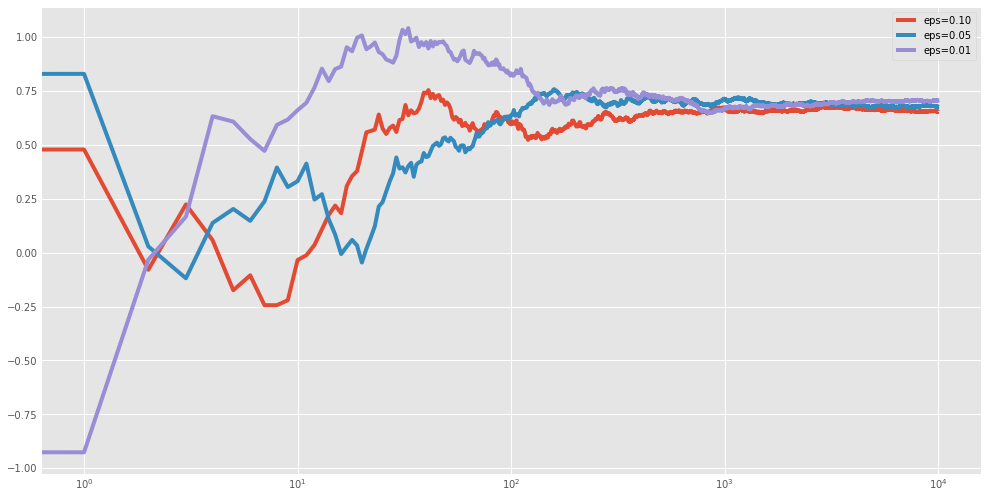

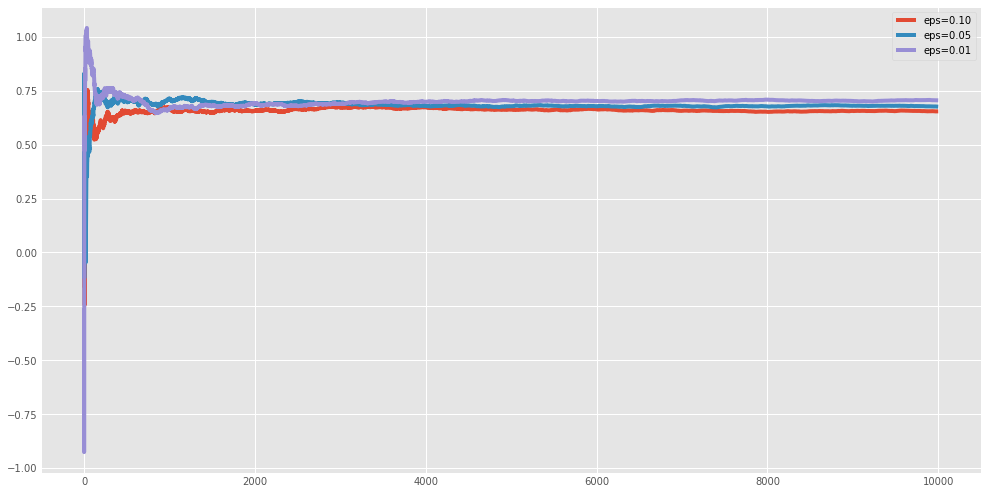

In [62]:
c_10 = experiment(eps=0.1)
c_05 = experiment(eps=0.05)
c_01 = experiment(eps=0.01)

plt.figure(figsize=(15, 8))
plt.plot(c_10, label="eps=0.10")
plt.plot(c_05, label="eps=0.05")
plt.plot(c_01, label="eps=0.01")
plt.legend()
plt.xscale('log')
plt.show() 


plt.figure(figsize=(15, 8))
plt.plot(c_10, label="eps=0.10")
plt.plot(c_05, label="eps=0.05")
plt.plot(c_01, label="eps=0.01")
plt.legend()
plt.show() 


Optimal bandit: 2
Mean estimate of bandit 0: 0.0000
Mean estimate of bandit 1: 0.0952
Mean estimate of bandit 2: 0.6981
Total reward earned: 6979.619626098465
Overall win rate: 0.6979619626098466
Num_times_explored: 5
Num_times_exploited: 9995
Num times selected optimal bandit: 9998


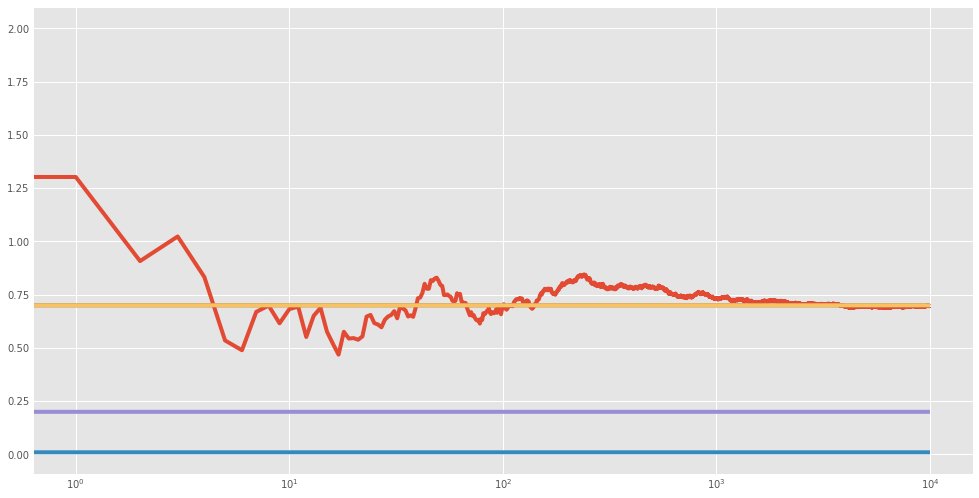

array([2.00128111, 1.30243346, 0.90778755, ..., 0.69790804, 0.69797928,
       0.69796196])

In [66]:
experiment(eps=10.0, decay=linear_decay, show_plots=True)

In [65]:
experiment(eps=0.75, decay=setup_alpha_decay(0.99))

Optimal bandit: 2
Mean estimate of bandit 0: -0.0118
Mean estimate of bandit 1: 0.1816
Mean estimate of bandit 2: -1.0151


array([0.19750619, 0.17683498, 0.02124325, ..., 0.18151043, 0.18140313,
       0.18131602])

Optimal bandit: 2
Mean estimate of bandit 0: 0.0406
Mean estimate of bandit 1: 0.3660
Mean estimate of bandit 2: 0.7242
Total reward earned: 6956.881194355561
Overall win rate: 0.6956881194355561
Num_times_explored: 93
Num_times_exploited: 9907
Num times selected optimal bandit: 9566


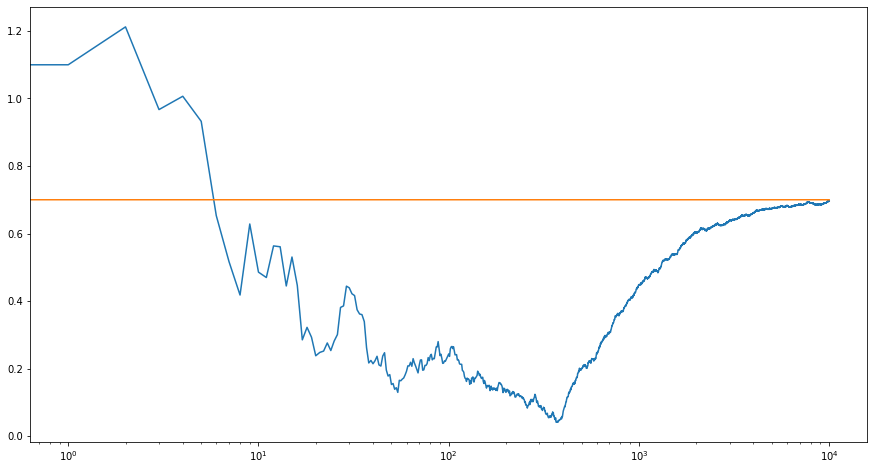

In [39]:
experiment(eps=0.75, decay=setup_max_decay(0.9))

Optimal bandit: 2
Mean estimate of bandit 0: 0.0285
Mean estimate of bandit 1: 0.2180
Mean estimate of bandit 2: 0.6848
Total reward earned: 6463.7731447044325
Overall win rate: 0.6463773144704432
Num_times_explored: 1020
Num_times_exploited: 8980
Num times selected optimal bandit: 9310


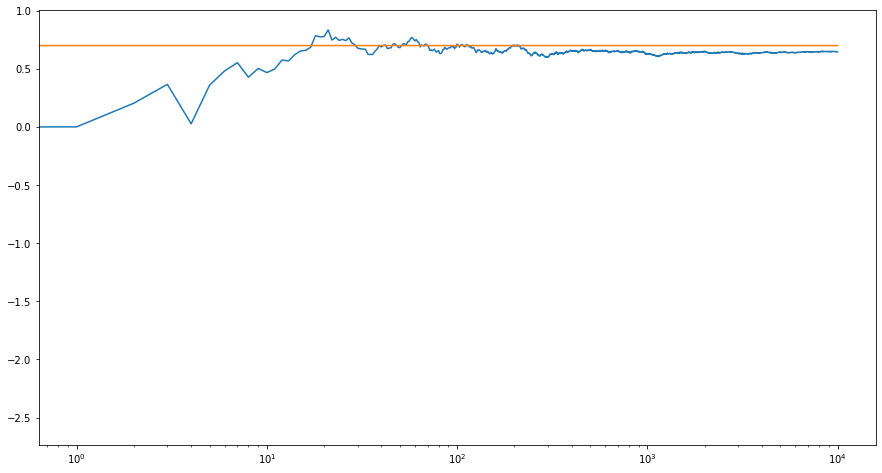

In [40]:
experiment(0.1)

Optimal bandit: 2
Mean estimate of bandit 0: 0.0745
Mean estimate of bandit 1: 0.0009
Mean estimate of bandit 2: 0.6855
Total reward earned: 6814.570863996027
Overall win rate: 0.6814570863996027
Num_times_explored: 94
Num_times_exploited: 9906
Num times selected optimal bandit: 9939


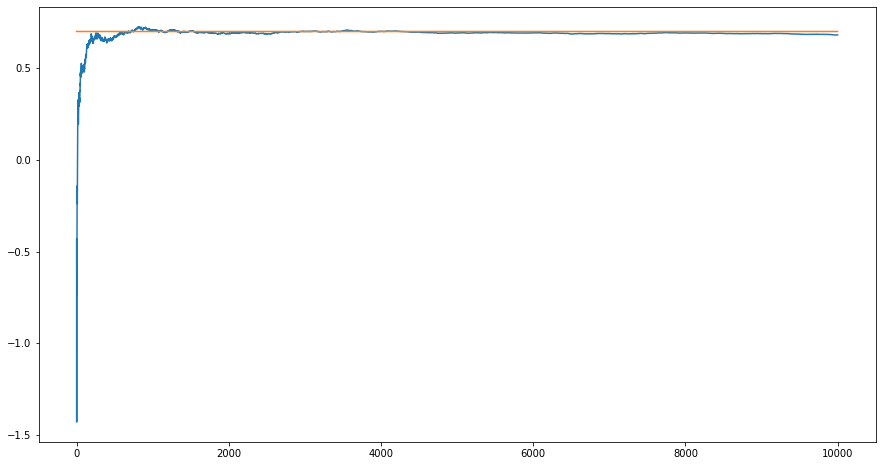

In [29]:
experiment(0.01)